In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('preterm.csv')

<h3><u>Explanation of column names:</u></h3>
<ul>
<li><b>'Count Contraction':</b><br>The number of contractions that occur within a certain time frame, such as an hour.</li><br>
<li><b>'Length of Contraction':</b><br> Duration of each contraction, measured in seconds.</li><br>
<li><b>'STD':</b><br> Standard deviation of the duration of contractions. This may be an indicator of how consistent the contractions are.</li><br>
<li><b>'Entropy':</b><br> Entropy or complexity of the pattern of contractions.</li><br>
<li><b>'Contraction Times':</b><br> Time intervals between each contraction, measured in seconds.</li><br>
<li><b>'Pre-term':</b><br> Pre-term or not.</li><br>
</ul>

## EDA

In [3]:
df.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [4]:
print(f'''
---------- Dataframe Summary ----------
Shape: \n{df.shape}

Columns: \n{df.columns}

Duplicate: \n{df.duplicated().sum()}

Null: \n{df.isnull().sum()}
---------------------------------------
''')



---------- Dataframe Summary ----------
Shape: 
(58, 6)

Columns: 
Index(['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times', 'Pre-term'],
      dtype='object')

Duplicate: 
1

Null: 
Count Contraction        0
lenght of contraction    0
STD                      0
Entropy                  0
Contraction times        0
Pre-term                 0
dtype: int64
---------------------------------------



In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      57 non-null     int64  
 1   lenght of contraction  57 non-null     int64  
 2   STD                    57 non-null     float64
 3   Entropy                57 non-null     float64
 4   Contraction times      57 non-null     int64  
 5   Pre-term               57 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 3.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count Contraction,57.0,2512.438596,3821.742366,222.000,398.000,495.000,1919.00,12452.000
lenght of contraction,57.0,26870.017544,62045.428533,2308.000,2641.000,3355.000,11481.00,228321.000
STD,57.0,48839.759211,8782.195737,29205.840,42902.890,49406.860,54431.03,63467.583
Entropy,57.0,0.879386,0.532868,0.428,0.488,0.581,1.21,2.067
Contraction times,57.0,0.631579,0.815729,0.000,0.000,0.000,1.00,2.000
Pre-term,57.0,0.315789,0.468961,0.000,0.000,0.000,1.00,1.000


In [8]:
df.nunique()

Count Contraction        44
lenght of contraction    46
STD                      49
Entropy                  47
Contraction times         3
Pre-term                  2
dtype: int64

## Plot Functions

In [9]:
def plot_countplot(col_name:str):
    plt.figure(figsize=(10,6))
    sns.countplot(df[col_name], data=df, palette='flare')
    plt.show()

In [10]:
def plot_barplot(col_name_1:str, col_name_2:str):
    plt.figure(figsize=(10,6))
    sns.barplot(y = df[col_name_1], x = df[col_name_2], data=df, palette='flare')
    plt.show()    

In [11]:
def plot_circleplot(col_name:str):
    label_data = df['Contraction times'].value_counts()


    plt.figure(figsize=(20, 10))
    patches, texts, pcts = plt.pie(label_data,
                                labels = label_data.index,
                                pctdistance = 0.65,
                                colors = ['orange', 'pink', 'purple'],
                                autopct = '%1.1f%%',
                                textprops={ 'fontsize': 25,
                                            'color': 'white',
                                            'weight': 'bold',
                                            'family': 'serif' })
    plt.setp(pcts, color='black')

    hfont = {'fontname':'serif', 'weight': 'bold', 'color':'white'}
    plt.title('Contraction Times', size=20, **hfont)

    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.show()

In [12]:
def plot_histplot(col_name:str):
    plt.figure(figsize=(10,6))
    sns.histplot(df['Entropy'], bins = 20, kde = True)
    plt.title(f'{col_name} - Count Plot')
    plt.show()

In [13]:
def plot_lineplot(col_name_1:str, col_name_2:str):
    plt.figure(figsize=(10,6))
    sns.lineplot(y = df[col_name_2], x = df[col_name_1], data=df)
    plt.show()

In [14]:
def plot_scatterplot(col_name_1:str, col_name_2:str):
    plt.figure(figsize=(10,6))
    sns.scatterplot(y = df[col_name_2], x = df[col_name_1], data=df)
    plt.show()

## Contraction Times

In [15]:
print(f'''
---------- Contraction Times Summary ----------
Unique: \n{df['Contraction times'].unique()}

Value Counts: \n{df['Contraction times'].value_counts()}
-----------------------------------------------
''')



---------- Contraction Times Summary ----------
Unique: 
[2 1 0]

Value Counts: 
0    33
2    12
1    12
Name: Contraction times, dtype: int64
-----------------------------------------------



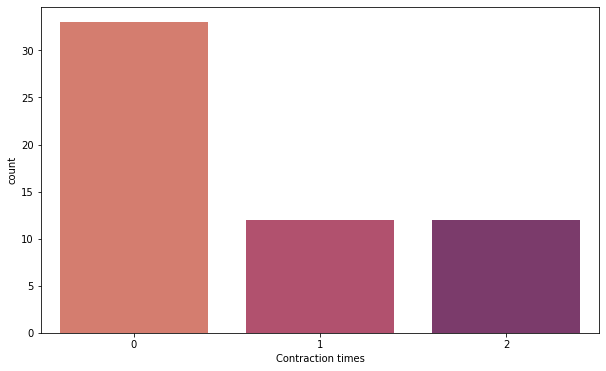

In [16]:
plot_countplot('Contraction times')

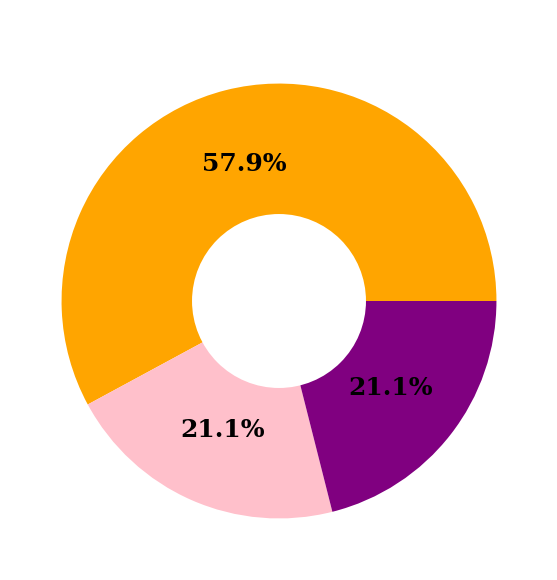

In [17]:
plot_circleplot('Contraction times')

## Pre-term

In [18]:
print(f'''
---------- Pre-term Summary ----------
Unique: \n{df['Pre-term'].unique()}

Value Counts: \n{df['Pre-term'].value_counts()}
---------------------------------------
''')


---------- Pre-term Summary ----------
Unique: 
[1 0]

Value Counts: 
0    39
1    18
Name: Pre-term, dtype: int64
---------------------------------------



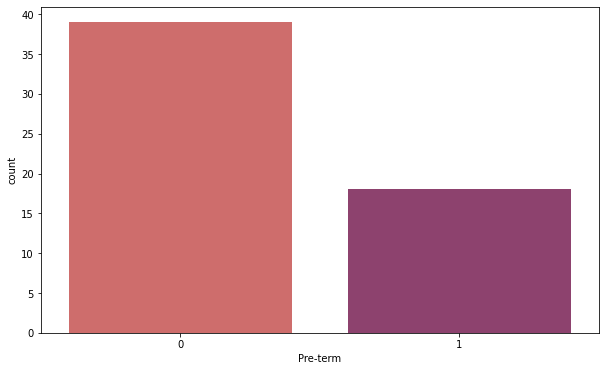

In [19]:
plot_countplot('Pre-term')

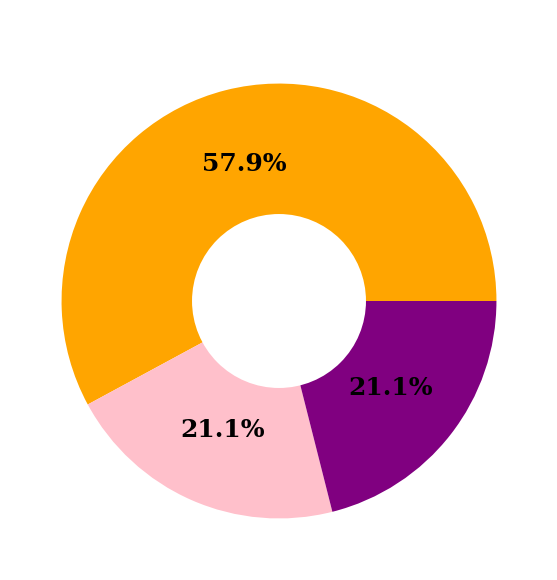

In [20]:
plot_circleplot('Pre-term')

## Plots

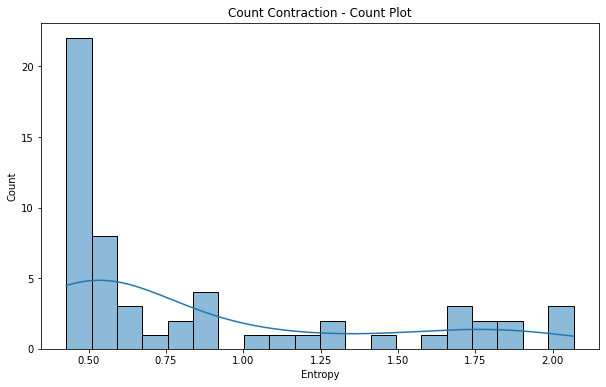

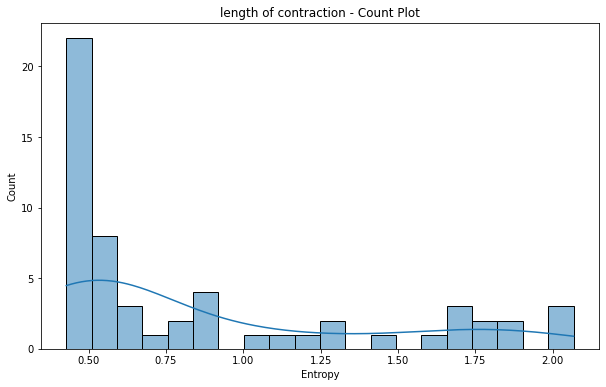

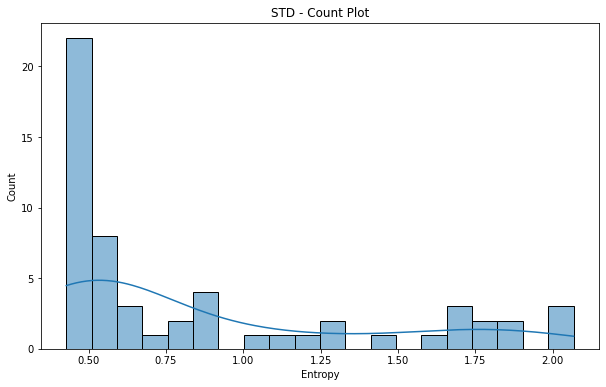

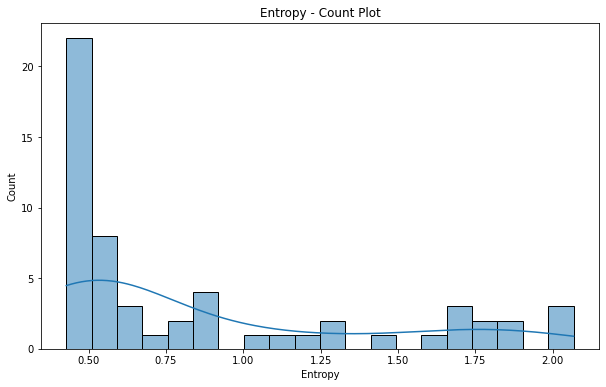

In [21]:
plot_cols = ['Count Contraction', 'length of contraction', 'STD', 'Entropy']
for col in plot_cols:
    plot_histplot(col)

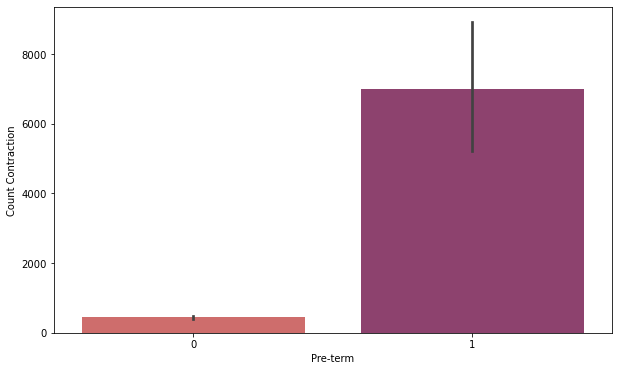

In [22]:
plot_barplot('Count Contraction', 'Pre-term')

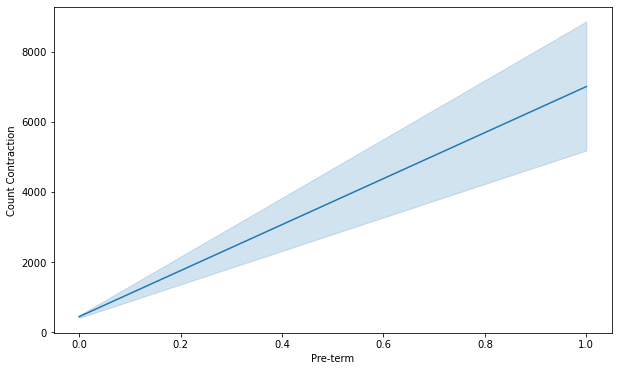

In [23]:
plot_lineplot('Pre-term','Count Contraction')

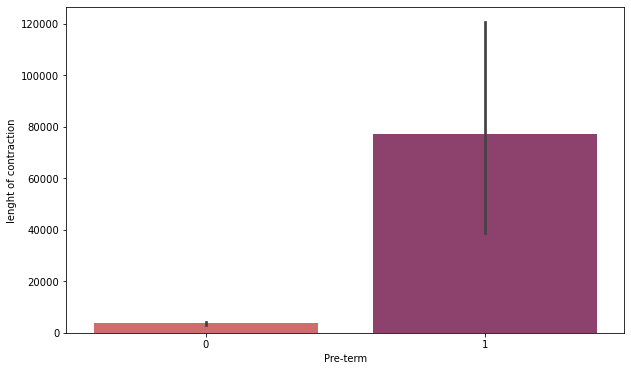

In [24]:
plot_barplot('lenght of contraction', 'Pre-term')

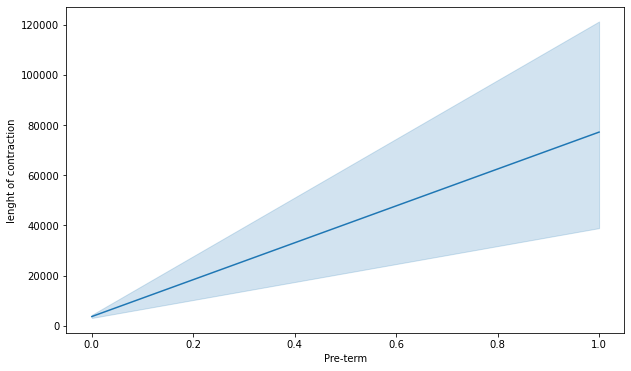

In [25]:
plot_lineplot('Pre-term', 'lenght of contraction')

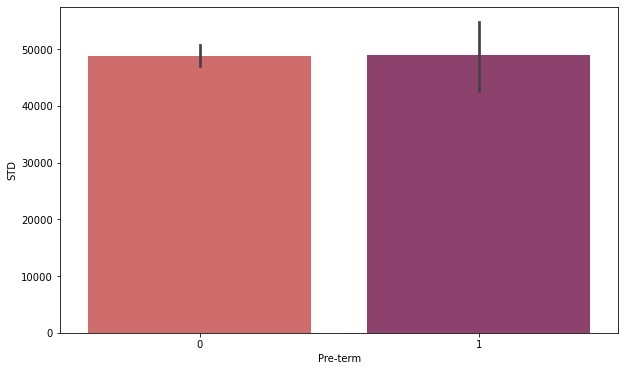

In [26]:
plot_barplot('STD', 'Pre-term')

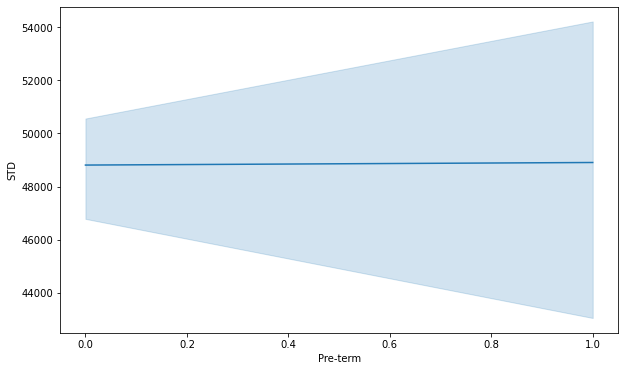

In [27]:
plot_lineplot('Pre-term', 'STD')

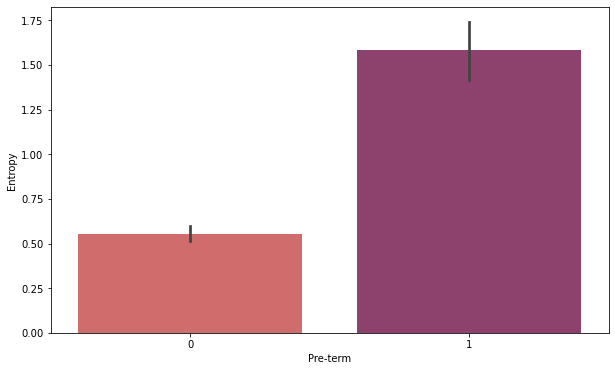

In [28]:
plot_barplot('Entropy', 'Pre-term')

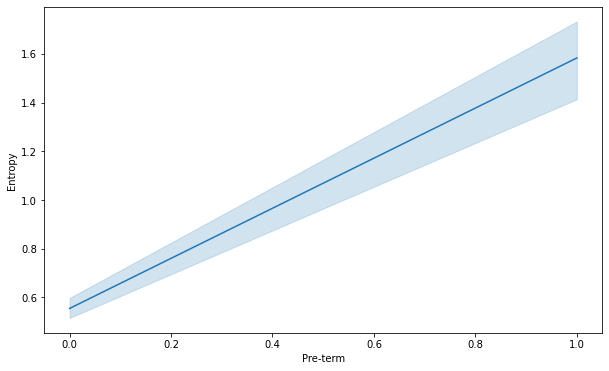

In [29]:
plot_lineplot('Pre-term', 'Entropy')

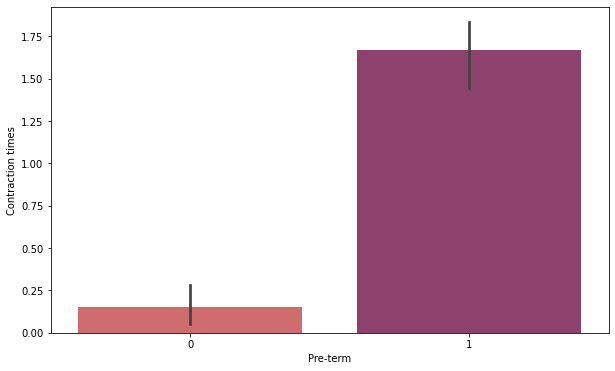

In [30]:
plot_barplot('Contraction times', 'Pre-term')

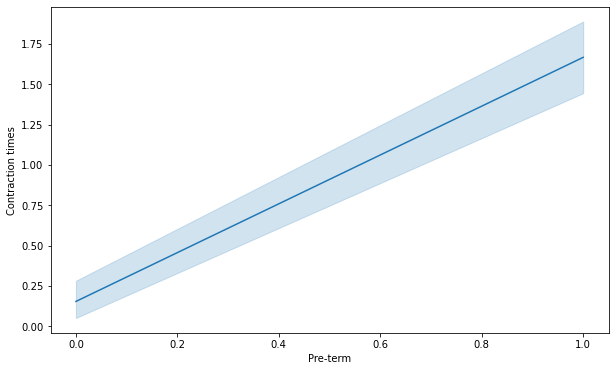

In [31]:
plot_lineplot('Pre-term', 'Contraction times')

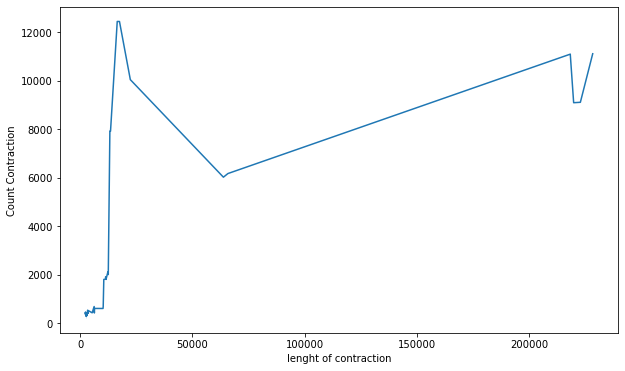

In [32]:
plot_lineplot('lenght of contraction', 'Count Contraction')

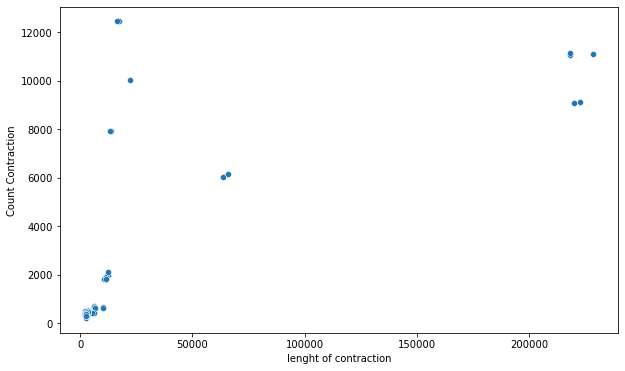

In [33]:
plot_scatterplot('lenght of contraction', 'Count Contraction')

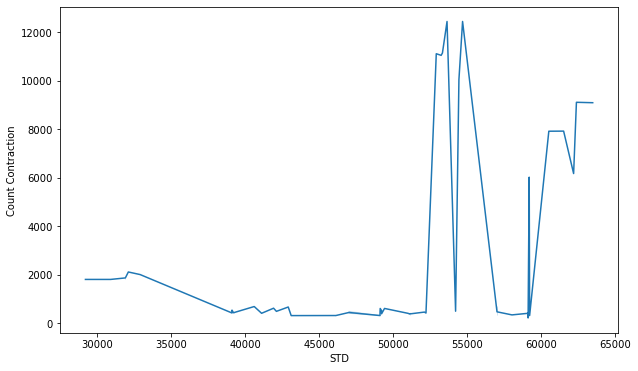

In [34]:
plot_lineplot('STD', 'Count Contraction')

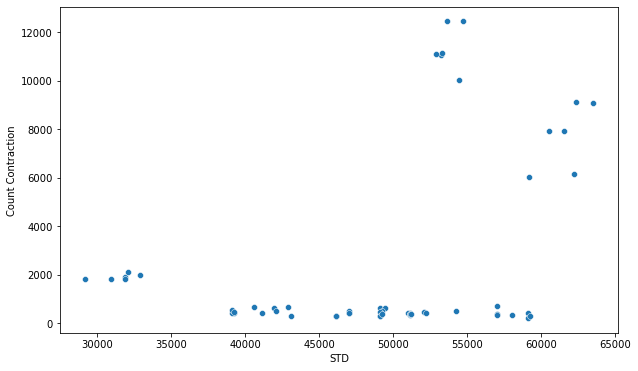

In [35]:
plot_scatterplot('STD','Count Contraction')

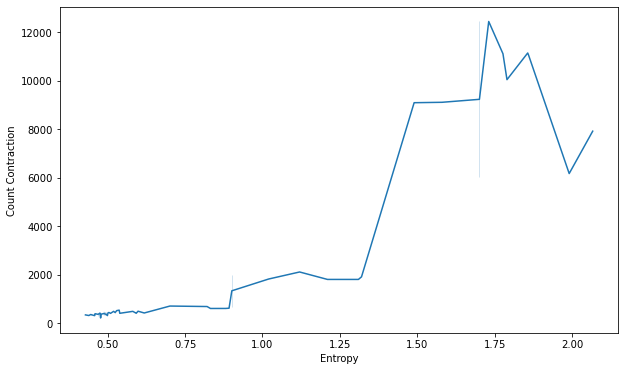

In [36]:
plot_lineplot('Entropy', 'Count Contraction')

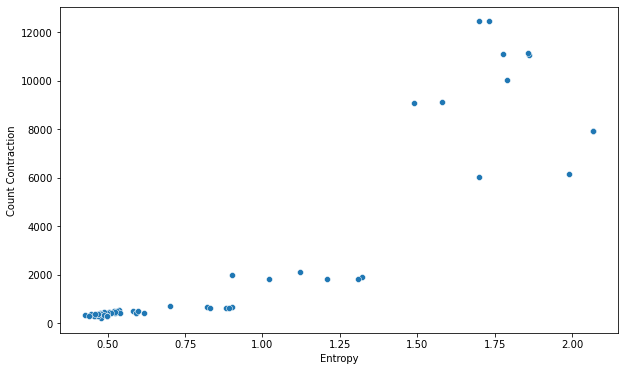

In [37]:
plot_scatterplot('Entropy','Count Contraction')

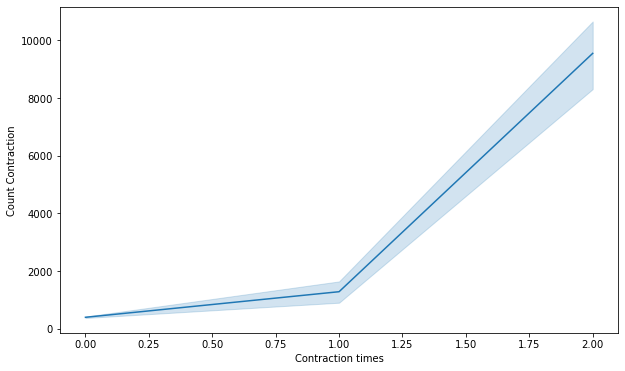

In [38]:
plot_lineplot('Contraction times', 'Count Contraction')

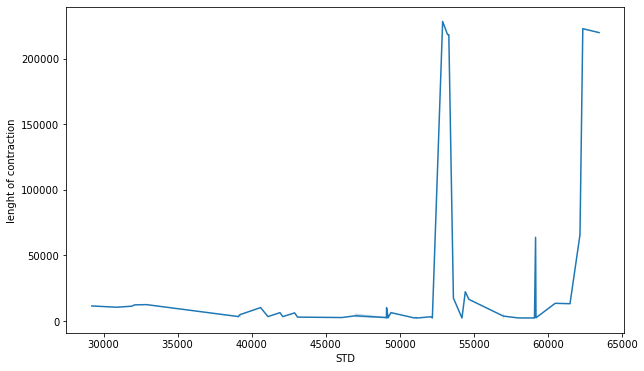

In [39]:
plot_lineplot('STD', 'lenght of contraction')

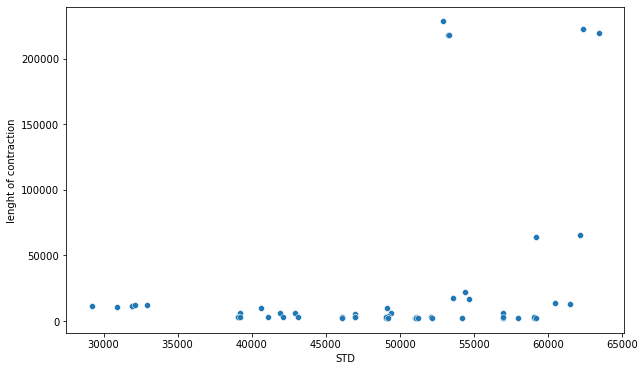

In [40]:
plot_scatterplot('STD','lenght of contraction')

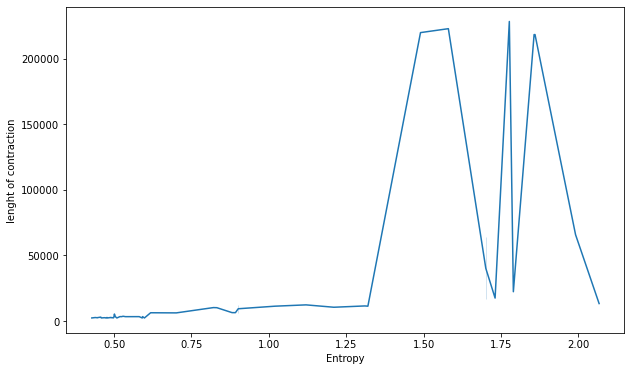

In [41]:
plot_lineplot('Entropy', 'lenght of contraction')

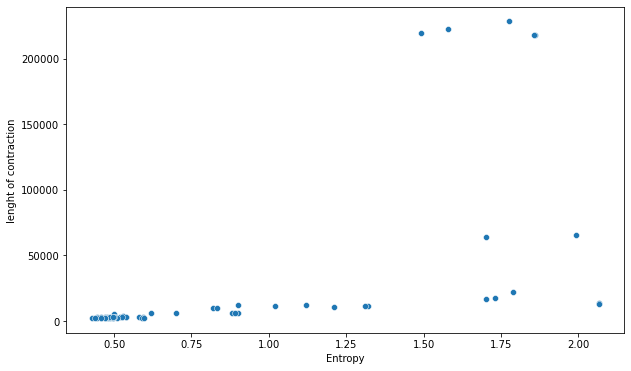

In [42]:
plot_scatterplot('Entropy', 'lenght of contraction')

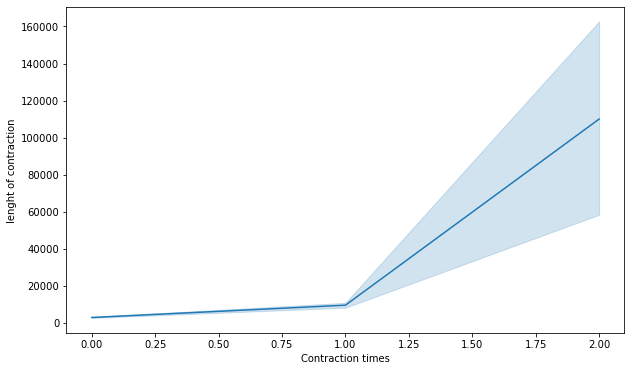

In [43]:
plot_lineplot('Contraction times', 'lenght of contraction')

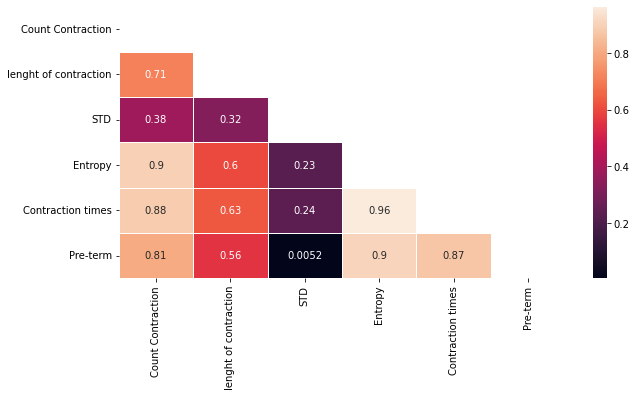

In [44]:
df_corr = df.corr()

plt.figure(figsize=(10, 5))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()